1) Write a code to solve the minimum of 2D function with Monte Carlo method

2) Write a code to solve the minimum of 2D function using the gradient descent method with variable step size by following the wikipedia page

# Part I

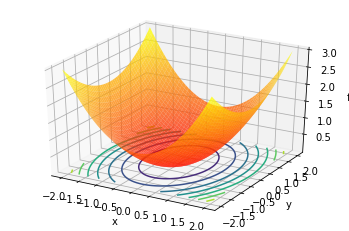

In [45]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2
y_min, y_max = -2, 2
k1, k2 = 1/2, 1/4

def f(x, y):
    return k1*x**2 + k2*y**2

# meshgrid
nx = np.linspace(x_min, x_max, 500)
ny = np.linspace(y_min, y_max, 500)
x, y = np.meshgrid(nx, ny)

# graph
z = f(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='autumn', alpha=0.75)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
plt.show()

If we consider the given 2D function, we can actually break it up into two separate functions before performing the Monte Carlo optimization.

In [50]:
def g(x):
    return k1*x**2 
def h(y):
    return k2*y**2
def MonteCarlo(N):
    
    # x-axis
    rand_x = np.random.random(N)
    f1 = np.delete(rand_x,rand_x!=g) 
    minimum_x = np.amin(f1) 


    # y-axis
    rand_y = np.random.random(N)
    f2 = np.delete(rand_y,rand_y!=h)
    minimum_y = np.amin(f2) 
    
    # plugs in min x,y to find min value
    min = f(minimum_x,minimum_y)
    z = min
    return z

In [51]:
N = [1000, 10000, 100000]
for i in N:
    print('n =', i, ', minimum at', MonteCarlo(i))

n = 1000 , minimum at 5.255158061112153e-07
n = 10000 , minimum at 9.176451152388323e-09
n = 100000 , minimum at 1.1126243019028422e-10


D:\Python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  if __name__ == '__main__':
D:\Python\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  from ipykernel import kernelapp as app


These are all close to zero.

# Part II

In [55]:
def derivative(f, x):
    h = 0.00000001
    numerator = f(x + h) - f(x)
    return numerator/h

def minimize(f, x0, step):
    x_now = x0
    x_next = x_now - step
    while derivative(f, x_next) > 0:
        x_now = x_next
        x_next = x_now - step
        if derivative(f, x_next) < 0:
            x_now = x_next + step
            x_next = x_now - 0.00001
            while f(x_next) < f(x_now):
                x_now = x_next
                x_next = x_now - 0.00001
    return x_now

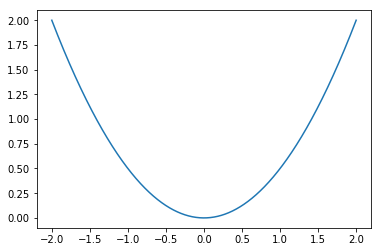

In [56]:
x = np.linspace(-2, 2, 10000)
y = x

plt.plot(x, g(x), label = 'g(x)')
plt.show()

In [57]:
x_best = minimize(g, 1, 1)
print(x_best)

0


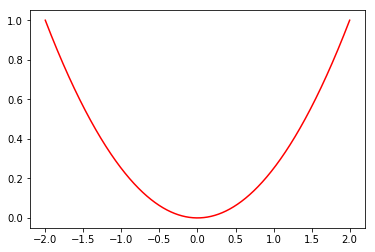

In [58]:
plt.plot(y, h(y), 'r', label = 'h(y)')
plt.show()

In [59]:
y_best = minimize(h, 1, 1)
print(y_best)
print('x_best =', x_best)
print('y_best =', y_best)
print('f(x_best, y_best) =', f(x_best, y_best))

0
x_best = 0
y_best = 0
f(x_best, y_best) = 0.0
